In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df = pd.read_csv("car_data.csv")

df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [2]:
#Removing commas in Price Column
df['Price']=df['Price'].str.replace(',','')

#Converting Price currency from Indian Rupees to US Dollars
df['Price'] = pd.to_numeric(df['Price'])
df.loc[:, 'Price'] *= 0.012

#Converting No. Owners from String description to int
df['No_of_Owners']=df['No_of_Owners'].str.replace('1st', "1")
df['No_of_Owners']=df['No_of_Owners'].str.replace('2nd', "2")
df['No_of_Owners']=df['No_of_Owners'].str.replace('3rd', "3")
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'])

df = df.rename(columns = {"Fuel_Tank_Capacity(L)" : "Fuel_Tank_Capacity(G)"})
df.loc[:, 'Fuel_Tank_Capacity(G)'] /= 3.785

df.head()

/tmp/ipykernel_1132148/1313943566.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Price'] *= 0.012


,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1,5,diesel,11.889036,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,7884.0
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1,5,petrol,11.889036,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,8184.0
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2,5,petrol,10.568032,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,9516.0
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1,5,petrol,7.397622,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,4968.0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1,5,petrol,11.360634,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,6180.0


In [3]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].replace(['BS IV'], 22.299999237060547)
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].replace(['105 bhp @ 4400 RPM'], 20.5)

df["Mileage(kmpl)"] = pd.to_numeric(df["Mileage(kmpl)"])
df.loc[:, "Mileage(kmpl)"] *= 2.35215
df = df.rename(columns={"Mileage(kmpl)": "Mileage(mpg)"})

df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(mpg),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1,5,diesel,11.889036,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,50.947569,BS IV,7884.0
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1,5,petrol,11.889036,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,40.433459,BS V,8184.0
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2,5,petrol,10.568032,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,38.810475,BS IV,9516.0
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1,5,petrol,7.397622,1.0L,999,5-Speed,Manual,67.00,91.00,51.041655,BS IV,4968.0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1,5,petrol,11.360634,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,44.455635,BS V,6180.0


In [4]:
df.describe()

,Make_Year,No_of_Owners,Seating_Capacity,Fuel_Tank_Capacity(G),CC_Displacement,Power(BHP),Torque(Nm),Mileage(mpg),Price
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2016.963115,1.165984,5.095287,11.171417,1301.155738,91.325758,144.381045,45.908883,8892.233607
std,2.818742,0.383119,0.446224,2.133302,276.867533,25.713275,66.780511,6.307982,4407.880506
min,2011.000000,1.000000,4.000000,3.963012,624.000000,34.000000,48.000000,24.462360,2256.000000
25%,2015.000000,1.000000,5.000000,9.775429,1197.000000,74.720000,110.000000,40.950932,5709.000000
50%,2017.000000,1.000000,5.000000,11.096433,1198.000000,83.325000,114.000000,44.455635,7998.000000
75%,2019.000000,1.000000,5.000000,11.889036,1497.000000,105.940000,158.000000,49.418672,10596.000000
max,2022.000000,3.000000,8.000000,18.494055,2179.000000,177.000000,380.000000,73.363558,35292.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               976 non-null    object 
 1   Make                   976 non-null    object 
 2   Model                  976 non-null    object 
 3   Make_Year              976 non-null    int64  
 4   Color                  976 non-null    object 
 5   Body_Type              976 non-null    object 
 6   Mileage_Run            976 non-null    object 
 7   No_of_Owners           976 non-null    int64  
 8   Seating_Capacity       976 non-null    int64  
 9   Fuel_Type              976 non-null    object 
 10  Fuel_Tank_Capacity(G)  976 non-null    float64
 11  Engine_Type            976 non-null    object 
 12  CC_Displacement        976 non-null    int64  
 13  Transmission           976 non-null    object 
 14  Transmission_Type      976 non-null    object 
 15  Power(

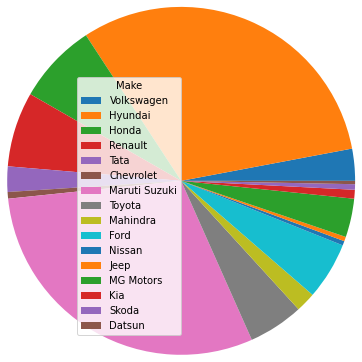

In [6]:
mat_df = df[["Price", "Make_Year"]]
makes = df['Make'].unique()
total = len(df.index)
makes_perc = []
for make in makes:
    makes_perc.append((df['Make'].value_counts()[make]/total)*100)

plt.pie(makes_perc, center = (10,20), radius = 2)
plt.legend(makes, loc='upper left', title = "Make")

plt.show()

In [7]:
sorted = df.sort_values(by=['Price'])

In [53]:
fig = px.histogram(df, x="Price", color = "Fuel_Type")

print("Mean price range: 5000 - 5999 - 120 cars in that range")
# 8892.233607
fig.add_shape(type='line',
                x0=8892.233607,
                y0=0,
                x1=8892.233607,
                y1=130,
                line=dict(color='Black',),
                xref='x',
                yref='y'
)
fig.show()

Mean price range: 5000 - 5999 - 120 cars in that range


In [59]:
fig = px.histogram(df, x="Car_Name")
fig.show()

In [9]:
#cheapest 10
sorted.head(10)

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(mpg),Emission,Price
921,Tata Nano [2008-2014] LX,Tata,Nano,2013,blue,hatchback,"33,744",1,4,petrol,3.963012,"624 cc, 2 cylinder, MPFI",624,4-Speed,Manual,35.00,48.00,43.279560,BS IV,2256.0
30,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,red,hatchback,"79,565",1,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,49.206978,BS IV,2844.0
272,Tata Nano GenX [2015-2018] XT,Tata,Nano GenX,2015,purple,hatchback,"44,736",1,5,petrol,6.340819,"2 cylinder, MPFI, Gasoline",624,4-Speed,Manual,37.00,51.00,55.510740,BS IV,2868.0
848,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,black,hatchback,"60,256",2,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,49.206978,BS IV,2940.0
196,Hyundai Eon [2011-2018] Magna +,Hyundai,Eon,2013,red,hatchback,"93,653",2,5,petrol,8.454425,Kappa Engine,814,5-Speed,Manual,68.05,94.14,47.113565,BS IV,2976.0
504,Maruti Suzuki Alto K10 [2010-2014] VXi,Maruti Suzuki,Alto K10,2011,silver,hatchback,"82,262",2,5,petrol,9.247028,K Series Petrol Engine,998,5-Speed,Manual,67.10,90.00,49.206978,BS IV,3060.0
499,Maruti Suzuki Alto K10 [2010-2014] LXi,Maruti Suzuki,Alto K10,2011,black,hatchback,"54,857",2,5,petrol,9.247028,K10B,998,5-Speed,Manual,67.10,90.00,49.206978,BS IV,3144.0
584,Maruti Suzuki Alto [2010-2013] LXI,Maruti Suzuki,Alto,2011,black,hatchback,"16,061",2,5,petrol,9.247028,In-Line Engine,796,5-Speed,Manual,46.30,62.00,46.337355,BS IV,3192.0
254,Chevrolet Beat [2011-2014] LS Diesel,Chevrolet,Beat,2013,blue,hatchback,"77,022",1,5,diesel,9.247028,XSDE Smartech,936,5-Speed,Manual,58.00,150.00,59.838696,BS IV,3204.0
214,Hyundai Eon [2011-2018] D-Lite+,Hyundai,Eon,2014,grey,hatchback,"38,592",2,5,petrol,8.454425,Petrol Engine,1798,5-Speed,Manual,55.20,74.50,49.630365,BS IV,3228.0


In [10]:
#most expensive 10
sorted.tail(10)

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(mpg),Emission,Price
668,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2021,white,suv,"49,279",1,5,diesel,15.852048,FWD,1956,6-Speed,Manual,167.68,350.0,40.950932,BS IV,23808.0
665,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2021,white,suv,"49,279",1,5,diesel,15.852048,FWD,1596,5-Speed,Manual,167.68,350.0,40.950932,BS IV,23808.0
666,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2021,white,suv,"49,279",1,5,diesel,15.852048,FWD,1596,5-Speed,Manual,167.68,350.0,40.950932,BS IV,23808.0
667,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2021,white,suv,"49,279",1,5,diesel,15.852048,FWD,1956,6-Speed,Manual,167.68,350.0,40.950932,BS IV,23808.0
628,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2020,red,suv,"30,234",1,5,diesel,15.852048,FWD,1596,5-Speed,Manual,167.68,350.0,40.950932,BS IV,24228.0
627,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2020,red,suv,"30,234",1,5,diesel,15.852048,FWD,1596,5-Speed,Manual,167.68,350.0,40.950932,BS IV,24228.0
629,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2020,red,suv,"30,234",1,5,diesel,15.852048,FWD,1956,6-Speed,Manual,167.68,350.0,40.950932,BS IV,24228.0
630,MG Motors Hector 2.0 Sharp,MG Motors,Hector,2020,red,suv,"30,234",1,5,diesel,15.852048,FWD,1956,6-Speed,Manual,167.68,350.0,40.950932,BS IV,24228.0
13,Tata Safari XZA Plus,Tata,Safari,2021,grey,suv,"15,059",1,7,diesel,13.210040,Kryotec 2.0 L Turbocharged Engine,1956,6-Speed,Automatic,167.67,350.0,39.986550,BS IV,25200.0
234,Skoda Superb [2019-2020] L&K TSI AT,Skoda,Superb,2019,black,sedan,"9,686",1,5,petrol,17.437252,"Turbocharged petrol engine, in-line, liquid co...",1798,7-Speed,Automatic,177.00,250.0,34.506040,BS V,35292.0


In [13]:
# Exploring the characteristics that the more expensive cars have in common

###mean is 8892.233607
top_half = df[df['Price']>8892.233607]
bottom_half = df[df['Price']<=8892.233607]

In [50]:
fig = px.histogram(df, x="Price", color ="No_of_Owners" )
fig.show()

print("All of the cars priced above 17k have only one owner")

most of the more expensive cars have 1 owner


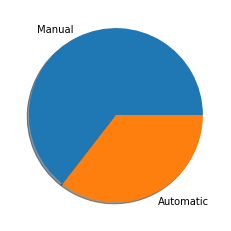

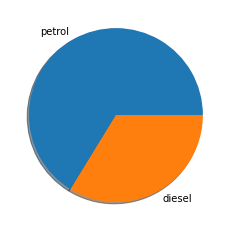

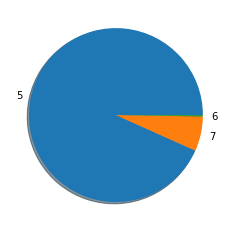

most of the more expensive cars are manual, run on petrol, and have a seating capacity of 5


In [14]:
top_total = len(top_half)

tt1 = top_half["Transmission_Type"].value_counts()["Manual"]
tt2 = top_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/top_total), (tt2/top_total)])
tt_labels = ["Manual", "Automatic"]
plt.pie(tt_arr, labels = tt_labels, shadow = True)
plt.show()

ft1 = top_half["Fuel_Type"].value_counts()["petrol"]
ft2 = top_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/top_total), (ft2/top_total)])
ft_labels = ["petrol", "diesel"]
plt.pie(ft_arr, labels = ft_labels, shadow = True)
plt.show()

top_half["Seating_Capacity"].unique()
sc1 = top_half["Seating_Capacity"].value_counts()[5.0]
sc2 = top_half["Seating_Capacity"].value_counts()[7.0]
sc3 = top_half["Seating_Capacity"].value_counts()[6.0]
sc_arr = np.array([(sc1/top_total), (sc2/top_total), (sc3/top_total)])
sc_labels = ["5", "7", "6"]
plt.pie(sc_arr, labels = sc_labels, shadow = True)
plt.show()

print("most of the more expensive cars are manual, run on petrol, and have a seating capacity of 5")

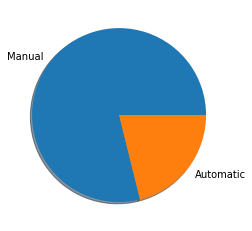

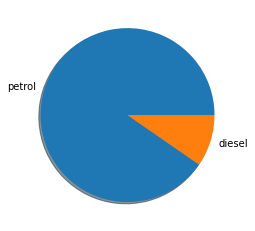

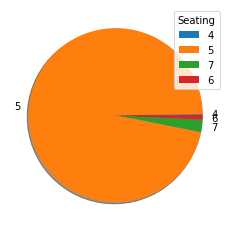

In [23]:
bottom_total = len(bottom_half)

tt1 = bottom_half["Transmission_Type"].value_counts()["Manual"]
tt2 = bottom_half["Transmission_Type"].value_counts()["Automatic"]
tt_arr = np.array([(tt1/bottom_total), (tt2/bottom_total)])
tt_labels = ["Manual", "Automatic"]
plt.pie(tt_arr, labels = tt_labels, shadow = True)
plt.show()

ft1 = bottom_half["Fuel_Type"].value_counts()["petrol"]
ft2 = bottom_half["Fuel_Type"].value_counts()["diesel"]
ft_arr = np.array([(ft1/bottom_total), (ft2/bottom_total)])
ft_labels = ["petrol", "diesel"]
plt.pie(ft_arr, labels = ft_labels, shadow = True)
plt.show()

# print(bottom_half["Seating_Capacity"].unique())
sc0 = bottom_half["Seating_Capacity"].value_counts()[4.0]
sc1 = bottom_half["Seating_Capacity"].value_counts()[5.0]
sc2 = bottom_half["Seating_Capacity"].value_counts()[7.0]
sc3 = bottom_half["Seating_Capacity"].value_counts()[8.0]

sc_arr = np.array([(sc0/bottom_total), (sc1/bottom_total), (sc2/bottom_total), (sc3/bottom_total)])
sc_labels = ["4", "5", "7", "8"]
plt.pie(sc_arr, labels = sc_labels, shadow = True)
plt.legend(title = "Seating")
plt.show()

In [56]:
f = px.histogram(df, x = "Price", color = "Make_Year")
f.show()
print("Most expensive cars have been made within the last 3 years")

Most expensive cars have been made within the last 3 years


In [61]:
ax = px.scatter(df, x = "Make_Year", y="Power(BHP)", color = "Make")
ax.show()
#In average, in terms of both torque and power the Mahindra and especially Tata shows continuous growth and improvements
"""
However, Chevrolet shows much more rapid growth and only appearing in year range of 2013 to 2015 and no more growth
On the other hand, Maruti shows almost no improvements in power(BHP) over the course of make years but they are shown to be recorded each year but currently its starting to go down
from it's peak which was around the year-range 2014 - 2016
Also, the highest power reached in each year was achieved by the Skoda, for 2012, 2014, 2019, and 2022.
Also, as torque and power are both dependant on the engine speed, I expected the torque and power to have an overall linear relationship,
which proved to be correct after creating a scatter plot that uses the x axis as the torque and the y axis as it's power.
"""

"\nHowever, Chevrolet shows much more rapid growth and only appearing in year range of 2013 to 2015 and no more growth\nOn the other hand, Maruti shows almost no improvements in power(BHP) over the course of make years but they are shown to be recorded each year but currently its starting to go down\nfrom it's peak which was around the year-range 2014 - 2016\nAlso, the highest power reached in each year was achieved by the Skoda, for 2012, 2014, 2019, and 2022.\nAlso, as torque and power are both dependant on the engine speed, I expected the torque and power to have an overall linear relationship,\nwhich proved to be correct after creating a scatter plot that uses the x axis as the torque and the y axis as it's power.\n"

In [62]:
df_mileage = px.histogram(df, x = "Mileage(mpg)", y = "Price")
df_mileage.show()
#shows the sum of the price, maybe theres a way to show just the price itself?